In [1]:
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sqrt, sin
from matplotlib import cm

In [2]:
def diskeq(r,theta):
    x = r*cos(theta)
    y = r*sin(theta)
    z = np.sqrt(x**2 + y**2)
    return x,y,z

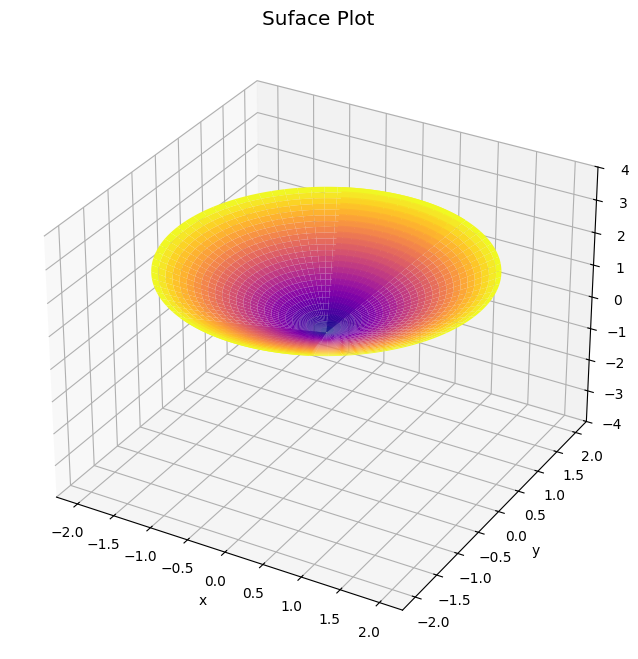

In [3]:
r = np.linspace(-2,2,200) 
theta = np.linspace(-2,2,200) 

R,T = np.meshgrid(r,theta)

X,Y,Z = diskeq(R,T)

# make the surface plot
fig = plt.figure(figsize=(12,8))           # get a new figure
ax = fig.add_subplot(111,projection='3d')  # get some 3D axes in the figure
plt.rc('font', size=12)
ax.plot_surface(X,Y,Z,cmap=cm.plasma)  # do the surface plot
ax.set_zlim(-4., 4.)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title (r'Suface Plot')

#elevate axis to viewer
# ax.view_init(elev=60,azim=150)
plt.show()

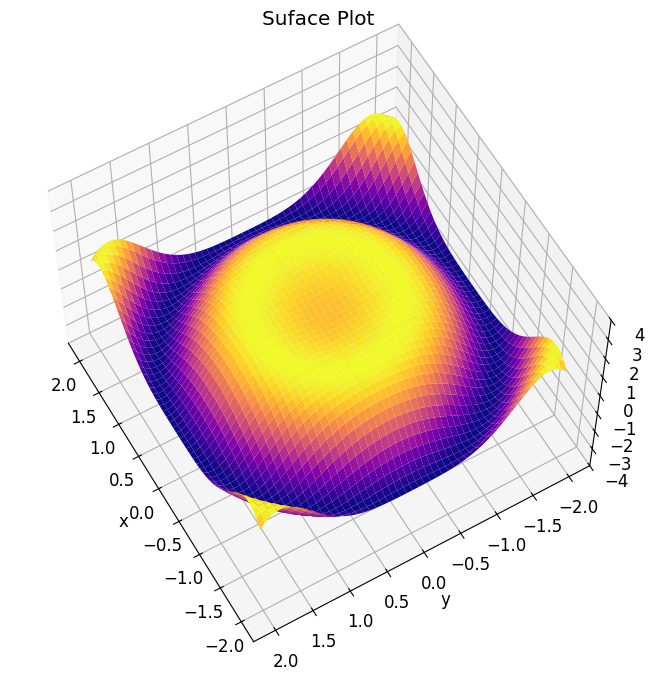

In [4]:
"""3D surface plot of a function f(x,y)."""


# make the data to be ploted
xs = np.linspace(-2,2,200)                 # row vector of x's
ys = np.linspace(-2,2,200)[:,np.newaxis]   # column vector of y's
zs = cos(xs**2 + ys**2) + sin(xs**2 + ys**2)                # 2D array of z's

# make the surface plot
fig = plt.figure(figsize=(12,8))           # get a new figure
ax = fig.add_subplot(111,projection='3d')  # get some 3D axes in the figure
plt.rc('font', size=12)
ax.plot_surface(xs,ys,zs,cmap=cm.plasma)  # do the surface plot
ax.set_zlim(-4., 4.)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title (r'Suface Plot')

#elevate axis to viewer
ax.view_init(elev=60,azim=150)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67e-11 #Newtons kg-2 m2.
c = 299792458 #m/s
Msun = 1.989e30 #kg

a = 0.998 # maximally spinning BH

rg=1.

rs = 2 * rg
i=30 * np.pi/180

def rms(spin): 
    '''
    spin here is the unitless -1<a<1 value
    output in units of rg
    '''
    z1 = 1 + (1 - spin**2)**(1/3) * ((1 + spin)**(1/3) + (1 - spin)**(1/3))
    z2 = np.sqrt(3 * spin**2 + z1**2)
    r_ms = (3 + z2 + np.sign(-spin) * np.sqrt( (3 - z1) * (3 + z1 + 2*z2) ) )
    return r_ms

r_ms = rg * rms(spin=a)

In [9]:
r=np.linspace(5, 30)
phi=np.linspace(0, 2*np.pi)

u = rs/r
# Energy ratio (Poutanen eq. 32, adapted from Luminet1979, Chen+1989)

def energy_shift(r,phi):
    u = rs/r

    beta = np.sqrt(u/(2*(1-u)))
   
    psi = np.arccos(np.sin(i) * np.cos(phi))

    alpha = np.arccos(1-(1-u)*(1-np.cos(psi)))

    xi = np.arccos(- np.sin(alpha)/np.sin(psi) * np.sin(i)*np.sin(phi))
    zeta = np.arccos(np.sin(alpha)/np.sin(psi) * np.cos(i))

    num = np.sqrt(1 - 3*u/2)
    den = 1+ beta * np.sin(i) * np.sin(phi) * np.sin(alpha) / np.sin(psi)
    return num/den

def diskeq(r,theta):
    x = r*cos(theta)
    y = r*sin(theta)
    z = energy_shift(r,theta)
    return x,y,z

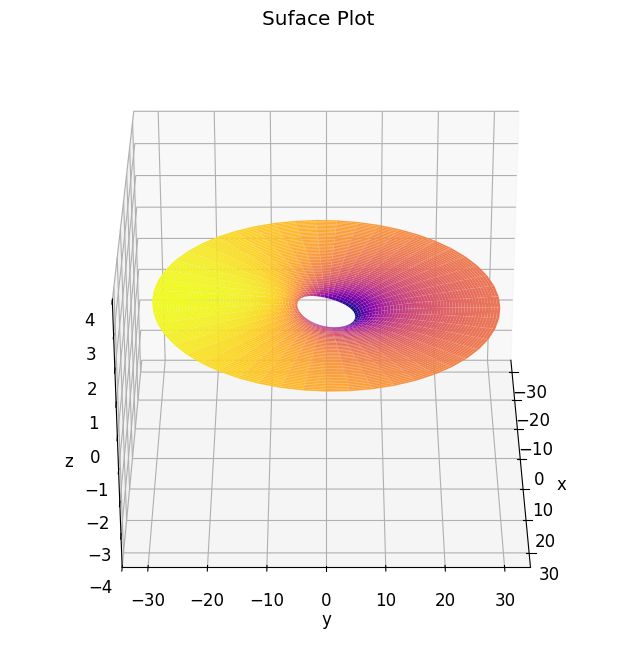

In [13]:
R,T = np.meshgrid(r,phi)

X,Y,Z = diskeq(R,T)

# make the surface plot
fig = plt.figure(figsize=(12,8))           # get a new figure
ax = fig.add_subplot(111,projection='3d')  # get some 3D axes in the figure
plt.rc('font', size=12)
ax.plot_surface(X,Y,Z,cmap=cm.plasma)  # do the surface plot
ax.set_zlim(-4., 4.)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title (r'Suface Plot')

#elevate axis to viewer
ax.view_init(elev=30,azim=0)
plt.show()